In [2]:
import numpy as np
from scipy import signal
from scipy import linalg
import matplotlib as mpl
import matplotlib.pyplot as plt

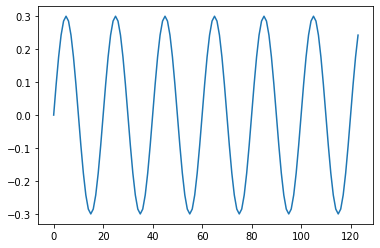

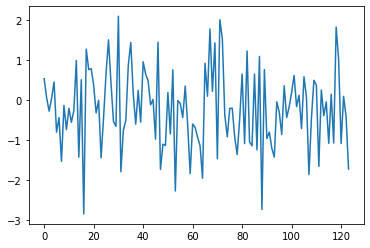

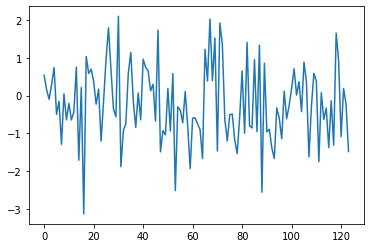

SNR: 0.045848449850956166
SNR(dB): -13.38675343364879


In [5]:
# dt = 0.001
# fs = 1/dt
# t = np.arange(0,1,dt)

fs = 1000.0
N = 124
t = np.arange(N) / fs

# print(t)

f_clean = 0.3*(np.sin(2*np.pi*50*t)) #+ np.sin(2*np.pi*120*t))
f_noise = np.random.randn(len(t))
f = f_clean + f_noise

plt.plot(f_clean)
plt.show()
plt.plot(f_noise)
plt.show()
plt.plot(f)
plt.show()

snr = np.var(f_clean)/np.var(f_noise)
print(f"SNR: {snr}")
snr_db = 10*np.log10(snr)
print(f"SNR(dB): {snr_db}")

/home/fabian/.local/lib/python3.6/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 1024 is greater than input length  = 124, using nperseg = 124
  .format(nperseg, input_length))


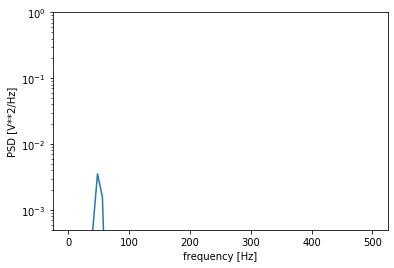

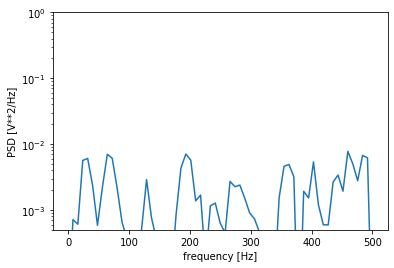

NameError: name 'y' is not defined

In [6]:
f_clean_y, f_clean_den = signal.welch(f_clean, fs, window='hann', nperseg=1024, scaling='density')
plt.semilogy(f_clean_y, f_clean_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

f_noise_y, f_noise_den = signal.welch(f_noise, fs, window='hann', nperseg=1024, scaling='density')
plt.semilogy(f_noise_y, f_noise_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

f_y, f_den = signal.welch(f, fs, window='hann', nperseg=1024, scaling='density')
plt.semilogy(y, f_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

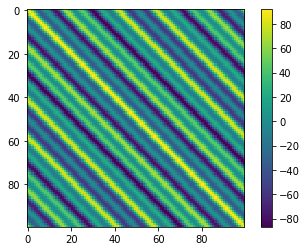

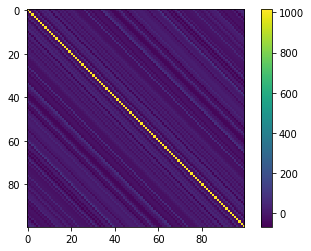

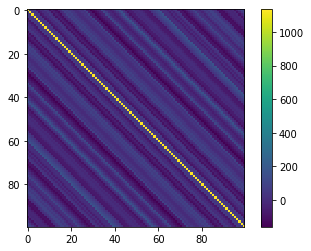

Noise only: 1.0422446635607046
Noise and signal: 0.928533915071209
Diff: -0.11371074848949558


In [159]:
################# Method 1 #################
def autoc(x, l):
    lam = 0
    for m in range(0, len(x)):
        i = m-l
        if i < 0:
            lam += (x[m] * np.mean(x))
        else:
            lam += (x[m] * x[i]) 
#     return lam / np.mean(x)          # normalized
    return lam

def cova(x):
    size = 100
    m = np.zeros((size, size))
    for i in range(0, size):
        for j in range(0, size):
            m[i][j] = autoc(x, abs(i-j))
    return m

################# Method 2 #################
# def cova(x):
#     size = 10
#     m = np.zeros((size, size))
#     for i in range(0, size):
#         for j in range(0, size):
#             co = signal.correlate(x, x, mode='same', method='auto')
#             m[i][j] = co[abs(i-j)]
#     return m

# ################# Method 3 #################
# def serial_corr(x, lag):
#     n = len(x)
#     y1 = x[lag:]
#     y2 = x[:n-lag]
#     corr = np.corrcoef(y1, y2, )[0, 1]
#     return corr

# def cova(x):
#     size = 10
#     m = np.zeros((size, size))
#     for i in range(0, size):
#         for j in range(0, size):
#             m[i][j] = serial_corr(x, abs(i-j))
# #             m[i][j] = co[abs(i-j)]
#     return m

c_clean = cova(f_clean)
c_noise = cova(f_noise)
c = cova(f)

plt.imshow(c_clean)
plt.colorbar()
plt.show()

plt.imshow(c_noise)
plt.colorbar()
plt.show()

plt.imshow(c)
plt.colorbar()
plt.show()

def test1(x):
    t1 = x.sum()
    t2 = x.trace()
    return t1/t2

def test2(x):
    eig = linalg.eigvals(x)
    eig_max = np.max(eig)
    eig_min = np.min(eig)
    return eig_max/eig_min
    
print(f"Noise only: {test1(c_noise)}")
print(f"Noise and signal: {test1(c)}")
print(f"Diff: {test1(c)-test1(c_noise)}")

# print(test2(c_noise))
# print(test2(c))